# Introduction to Derivatives: A Beginner's Guide

Excellent work with limits! Now we'll use what you've learned to understand derivatives - the heart of differential calculus.

In [26]:
# Setting up our environment
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

%matplotlib inline
plt.style.use("seaborn-v0_8")

## What is a Derivative? (In Simple Terms)

Think of a derivative as the "speedometer" of a function. Just like a car's speedometer tells you how fast you're going at each moment, a derivative tells you how quickly a function's values are changing at each point.

In everyday terms:

- If you're walking uphill, the steepness of the hill at each point is like the derivative
- If you're tracking temperature throughout the day, the rate at which it's warming or cooling at each moment is the derivative
- If you're watching a car move, its speed at each moment is the derivative of its position

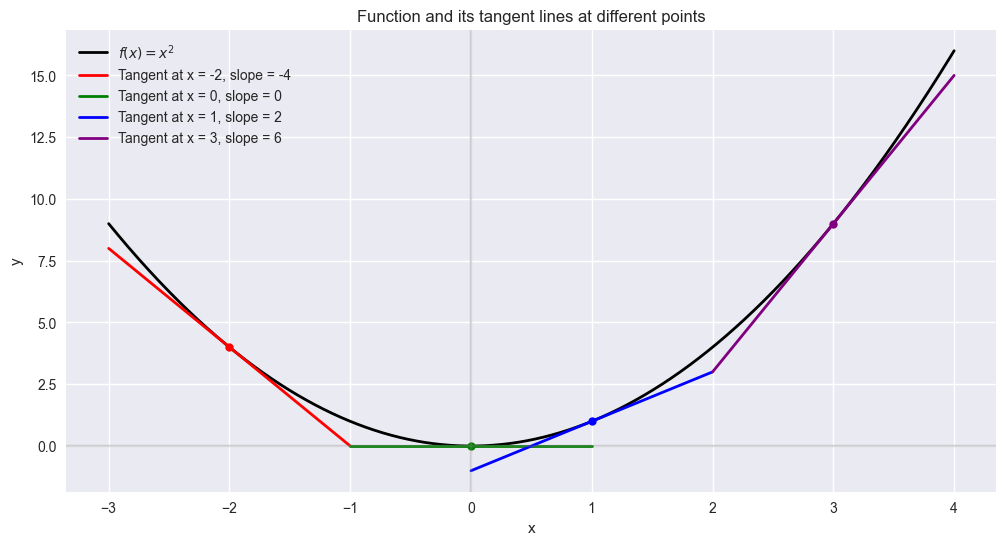

In [27]:
# Let's visualize the concept of a derivative as the slope of a tangent line
def f(x: float) -> float:
    """Calculate the square of a number.

    Args:
        x: The input value

    Returns:
        The square of x
    """
    return x**2  # Our example function f(x) = x²


def derivative_f(x: float) -> float:
    """Calculate the derivative of x².

    Args:
        x: The input value

    Returns:
        The derivative of x², which is 2x
    """
    return 2 * x  # The derivative of x² is 2x


def tangent_line(x: float, a: float) -> float:
    """Calculate the equation of the tangent line at point a.

    Args:
        x: The input value where we want to evaluate the tangent line
        a: The point of tangency

    Returns:
        The y-value of the tangent line at point x
    """
    # Equation of tangent line at x = a
    # y - f(a) = f'(a)(x - a)
    # y = f(a) + f'(a)(x - a)
    return f(a) + derivative_f(a) * (x - a)


# Create a figure
plt.figure(figsize=(12, 6))

# Points to evaluate derivatives at
a_values = [-2, 0, 1, 3]
colors = ["red", "green", "blue", "purple"]

# The x range for our main function
x = np.linspace(-3, 4, 1000)

# Plot the main function
plt.plot(x, f(x), "k-", linewidth=2, label=r"$f(x) = x^2$")

# Plot the tangent lines at each point
for a, color in zip(a_values, colors):
    # Plot the tangent line (just around the point)
    x_tangent = np.linspace(a - 1, a + 1, 100)
    plt.plot(
        x_tangent,
        tangent_line(x_tangent, a),
        color=color,
        linewidth=2,
        label=f"Tangent at x = {a}, slope = {derivative_f(a)}",
    )

    # Mark the point of tangency
    plt.plot(a, f(a), "o", color=color, markersize=6)

plt.grid(True)
plt.title("Function and its tangent lines at different points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.axhline(y=0, color="gray", linestyle="-", alpha=0.3)
plt.axvline(x=0, color="gray", linestyle="-", alpha=0.3)
plt.show()

## Real-World Meaning of Derivatives

The derivative measures:

- Rate of change
- Steepness at a point
- How sensitive one value is to changes in another

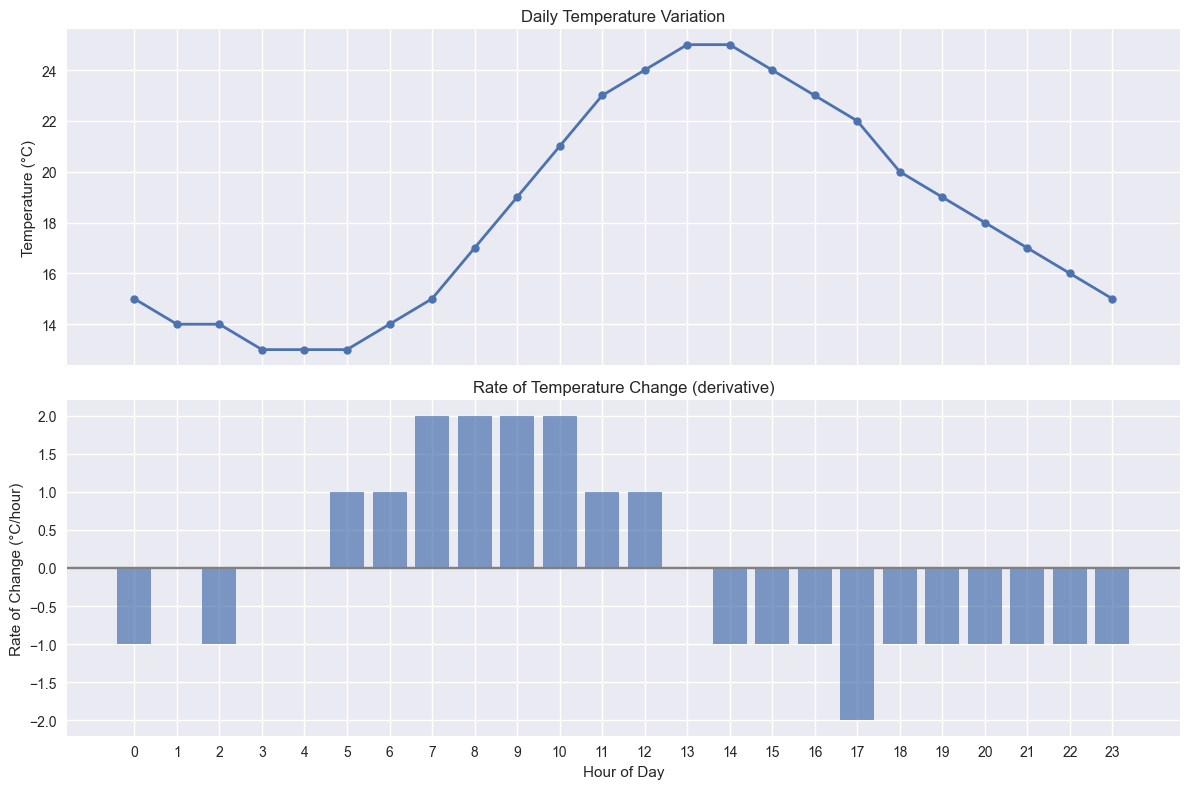

In [28]:
# Let's visualize a real-world application: temperature changing throughout the day

# Example temperature data (hourly readings from 0:00 to 23:00)
hours = np.arange(0, 24)
temperatures = [15, 14, 14, 13, 13, 13, 14, 15, 17, 19, 21, 23, 24, 25, 25, 24, 23, 22, 20, 19, 18, 17, 16, 15]

# Calculate rate of change (simple finite differences)
rates_of_change = np.diff(temperatures)
# Add a zero at the end to match length (crude approximation)
rates_of_change = np.append(rates_of_change, rates_of_change[-1])

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot temperature
ax1.plot(hours, temperatures, "o-", linewidth=2, markersize=6)
ax1.set_ylabel("Temperature (°C)")
ax1.set_title("Daily Temperature Variation")
ax1.grid(True)

# Plot rate of change (derivative)
ax2.bar(hours, rates_of_change, width=0.8, alpha=0.7)
ax2.axhline(y=0, color="gray", linestyle="-")
ax2.set_ylabel("Rate of Change (°C/hour)")
ax2.set_xlabel("Hour of Day")
ax2.set_title("Rate of Temperature Change (derivative)")
ax2.set_xticks(hours)
ax2.grid(True)

plt.tight_layout()
plt.show()

## The Two Common Notations

The derivative of a function f(x) is written as:

- $f'(x)$ (read as "f prime of x")
- $\frac{df}{dx}$ (read as "d f d x")

Both mean the same thing: the rate at which f(x) changes as x changes.

## The Formal Definition Made Simpler

The formal definition uses limits:

$$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$

What this really means:

1. Take a point x on your function
2. Take another point a tiny step (h) away: (x+h)
3. Calculate the steepness between these points: $\frac{f(x+h) - f(x)}{h}$
4. Make h smaller and smaller, approaching zero
5. The final steepness you get (as h gets infinitely small) is the derivative

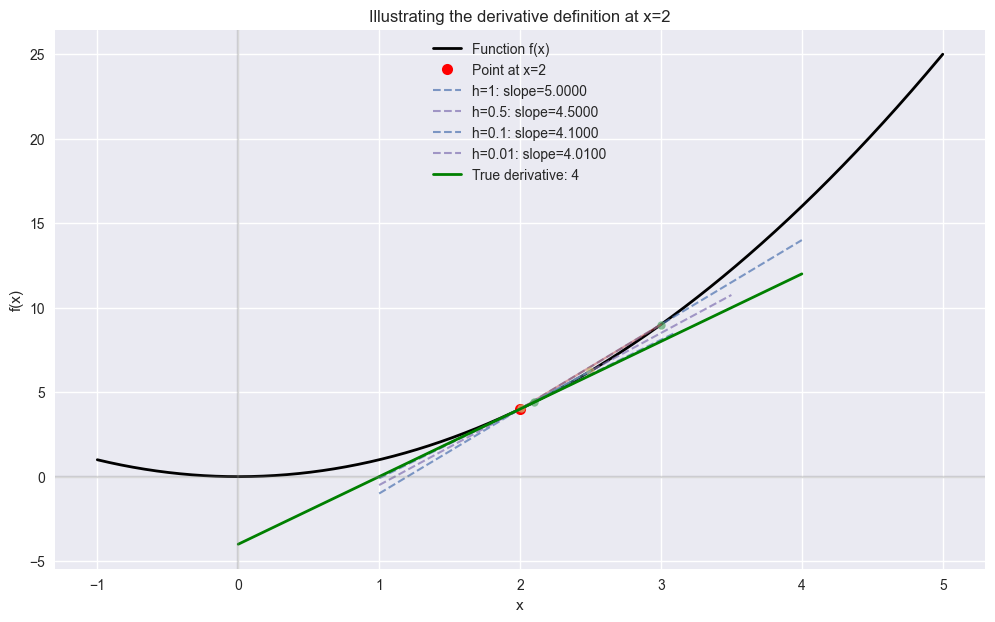

In [29]:
# Let's visualize how the derivative definition works with a specific example
def visualize_derivative_definition(f: callable, x0: float, h_values: list) -> None:
    """Visualize the derivative definition using secant lines.

    Args:
        f: The function to differentiate
        x0: The point where we want to find the derivative
        h_values: A list of h values to show secant lines for

    Returns:
        None (displays a plot)
    """
    plt.figure(figsize=(12, 7))

    # Our function values
    x = np.linspace(x0 - 3, x0 + 3, 1000)
    y = f(x)

    # Plot the function
    plt.plot(x, y, "k-", linewidth=2, label=f"Function f(x)")

    # Mark the point at x0
    plt.plot(x0, f(x0), "ro", markersize=8, label=f"Point at x={x0}")

    # For each h value, show the secant line and calculate the slope
    for h in h_values:
        # Calculate the second point
        x1 = x0 + h
        y1 = f(x1)

        # Calculate slope of secant line
        slope = (y1 - f(x0)) / h

        # Create the secant line
        line_x = np.array([x0 - 1, x1 + 1])
        line_y = f(x0) + slope * (line_x - x0)

        # Plot the secant line
        plt.plot(line_x, line_y, "--", linewidth=1.5, alpha=0.7, label=f"h={h}: slope={slope:.4f}")

        # Mark the second point
        plt.plot(x1, y1, "o", markersize=6, alpha=0.7)

        # Draw a line connecting the points
        plt.plot([x0, x1], [f(x0), y1], "-", linewidth=1.5, alpha=0.5)

    # True derivative at x0
    true_deriv = 2 * x0  # derivative of x² is 2x

    # Add a tangent line using the true derivative
    tangent_x = np.array([x0 - 2, x0 + 2])
    tangent_y = f(x0) + true_deriv * (tangent_x - x0)
    plt.plot(tangent_x, tangent_y, "g-", linewidth=2, label=f"True derivative: {true_deriv}")

    plt.grid(True)
    plt.title(f"Illustrating the derivative definition at x={x0}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.axhline(y=0, color="gray", linestyle="-", alpha=0.3)
    plt.axvline(x=0, color="gray", linestyle="-", alpha=0.3)
    plt.show()


# Demonstrate with f(x) = x² at x = 2 with various h values
visualize_derivative_definition(lambda x: x**2, 2, [1, 0.5, 0.1, 0.01])

In [30]:
# Let's create a table to show how the difference quotient approaches the derivative
def difference_quotient(f: callable, x: float, h: float) -> float:
    """Calculate the difference quotient (f(x+h) - f(x))/h.

    Args:
        f: The function to differentiate
        x: The point where we're approximating the derivative
        h: The small change in x

    Returns:
        The difference quotient approximation of the derivative
    """
    return (f(x + h) - f(x)) / h


# Our function and its derivative
def f(x: float) -> float:
    """Calculate x squared.

    Args:
        x: The input value

    Returns:
        The square of x
    """
    return x**2


def df(x: float) -> float:
    """Calculate the derivative of x squared.

    Args:
        x: The input value

    Returns:
        The derivative of x squared (2x)
    """
    return 2 * x


# Point to evaluate at
x = 2

# Various h values, decreasing towards 0
h_values = [1, 0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001]

# Calculate difference quotients and true derivative
diff_quotients = [difference_quotient(f, x, h) for h in h_values]
true_derivative = df(x)

# Create a table
print(f"Difference quotient (f(x+h) - f(x))/h as h approaches 0 at x = {x}")
print("-" * 60)
print(f"{'h':^15} | {'Difference Quotient':^20} | {'Error from True Derivative':^25}")
print("-" * 60)
for h, diff in zip(h_values, diff_quotients):
    error = abs(diff - true_derivative)
    print(f"{h:^15} | {diff:^20.10f} | {error:^25.15f}")

print("-" * 60)
print(f"{'Limit as h→0':^15} | {true_derivative:^20.10f} | {'0':^25}")

Difference quotient (f(x+h) - f(x))/h as h approaches 0 at x = 2
------------------------------------------------------------
       h        | Difference Quotient  | Error from True Derivative
------------------------------------------------------------
       1        |     5.0000000000     |     1.000000000000000    
      0.5       |     4.5000000000     |     0.500000000000000    
      0.1       |     4.1000000000     |     0.100000000000001    
     0.01       |     4.0100000000     |     0.009999999999891    
     0.001      |     4.0010000000     |     0.000999999999699    
    0.0001      |     4.0001000000     |     0.000100000007834    
     1e-05      |     4.0000100000     |     0.000010000027032    
------------------------------------------------------------
 Limit as h→0   |     4.0000000000     |             0            


## A Concrete Example Without Math Notation

Imagine tracking temperature throughout the day:

- At 1:00 PM: 70°F
- At 1:10 PM: 71°F

To find the rate of change:

- Temperature change: 71 - 70 = 1°F
- Time change: 10 minutes
- Rate of change: 1°F ÷ 10 minutes = 0.1°F per minute

This gives the average rate over 10 minutes. For the instantaneous rate at exactly 1:00 PM, we'd make the time interval smaller and smaller:

- Check temperature at 1:01 PM (1 minute later)
- Then at 1:00:10 PM (10 seconds later)
- Then at 1:00:01 PM (1 second later)

As this time gap approaches zero, we get the instantaneous rate at exactly 1:00 PM.

## Visual Understanding with a Picture

Imagine you have a curved line (a function). If you zoom in closer and closer to a single point on that curve, eventually it starts to look like a straight line. The steepness of that straight line is the derivative at that point.

![Derivative as tangent line](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Tangent_to_a_curve.svg/400px-Tangent_to_a_curve.svg.png)

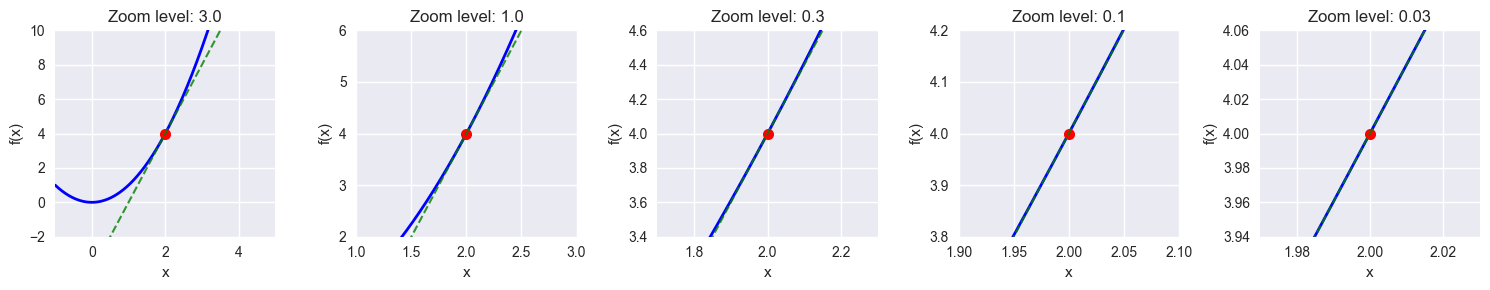

In [31]:
# Let's simulate "zooming in" to show how a curve becomes a straight line
def f(x: float) -> float:
    """Calculate x squared.

    Args:
        x: The input value

    Returns:
        The square of x
    """
    return x**2


# Point to zoom in on
x0 = 2
y0 = f(x0)

# Create zoom levels
zoom_levels = [3.0, 1.0, 0.3, 0.1, 0.03]


# Function to create a plot at a specific zoom level
def create_zoomed_plot(zoom: float) -> None:
    """Create a plot of the function at a specific zoom level.

    Args:
        zoom: The zoom level (smaller values = more zoomed in)

    Returns:
        None (displays on a subplot)
    """
    x = np.linspace(x0 - zoom, x0 + zoom, 1000)
    y = f(x)

    plt.plot(x, y, "b-", linewidth=2)
    plt.plot(x0, y0, "ro", markersize=8)

    # Add tangent line
    derivative = 2 * x0
    tangent_x = np.array([x0 - zoom, x0 + zoom])
    tangent_y = y0 + derivative * (tangent_x - x0)
    plt.plot(tangent_x, tangent_y, "g--", linewidth=1.5, alpha=0.8)

    plt.grid(True)
    plt.title(f"Zoom level: {zoom}")
    plt.xlim(x0 - zoom, x0 + zoom)
    plt.ylim(y0 - zoom * 2, y0 + zoom * 2)
    plt.xlabel("x")
    plt.ylabel("f(x)")


# Create a figure with subplots for each zoom level
fig, axs = plt.subplots(1, len(zoom_levels), figsize=(15, 3))

for i, zoom in enumerate(zoom_levels):
    plt.sca(axs[i])  # Set current axis
    create_zoomed_plot(zoom)

plt.tight_layout()
plt.show()

## What Derivative Values Tell You

- **Positive derivative $(f'(x) > 0)$**: Function is increasing (going up)
- **Negative derivative $(f'(x) < 0)$**: Function is decreasing (going down)
- **Zero derivative $(f'(x) = 0)$**: Function is flat at that point (not increasing or decreasing)
- **Larger derivative value**: Function is changing more rapidly

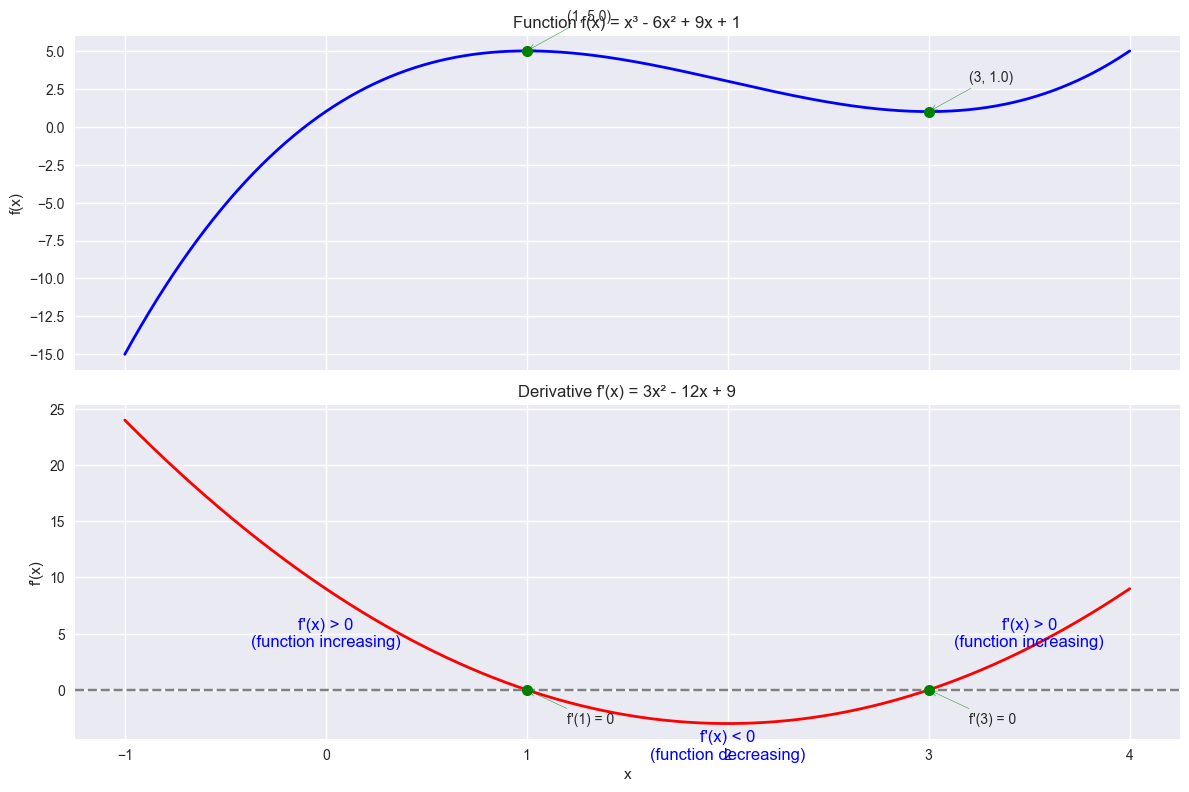

In [32]:
# Let's visualize a function along with its derivative
def f(x: float) -> float:
    """Calculate a cubic function with interesting behavior.

    Args:
        x: The input value

    Returns:
        x^3 - 6x^2 + 9x + 1
    """
    return x**3 - 6 * x**2 + 9 * x + 1  # A cubic function with some interesting behavior


def df(x: float) -> float:
    """Calculate the derivative of f(x).

    Args:
        x: The input value

    Returns:
        The derivative: 3x^2 - 12x + 9
    """
    return 3 * x**2 - 12 * x + 9  # The derivative of f(x)


# Create x values
x = np.linspace(-1, 4, 1000)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot the function
ax1.plot(x, f(x), "b-", linewidth=2)
ax1.set_title("Function f(x) = x³ - 6x² + 9x + 1")
ax1.set_ylabel("f(x)")
ax1.grid(True)

# Plot the derivative
ax2.plot(x, df(x), "r-", linewidth=2)
ax2.set_title("Derivative f'(x) = 3x² - 12x + 9")
ax2.set_xlabel("x")
ax2.set_ylabel("f'(x)")
ax2.grid(True)
ax2.axhline(y=0, color="gray", linestyle="--")

# Mark the critical points (where derivative = 0)
# Solving 3x² - 12x + 9 = 0
critical_points = [1, 3]  # x = 1 and x = 3
for cp in critical_points:
    # Mark on function plot
    ax1.plot(cp, f(cp), "go", markersize=8)
    ax1.annotate(
        f"({cp}, {f(cp):.1f})",
        xy=(cp, f(cp)),
        xytext=(cp + 0.2, f(cp) + 2),
        arrowprops=dict(arrowstyle="->", color="green"),
    )

    # Mark on derivative plot
    ax2.plot(cp, df(cp), "go", markersize=8)
    ax2.annotate(
        f"f'({cp}) = 0", xy=(cp, df(cp)), xytext=(cp + 0.2, df(cp) - 3), arrowprops=dict(arrowstyle="->", color="green")
    )

# Annotate regions where derivative is positive/negative
ax2.annotate(
    "f'(x) < 0\n(function decreasing)", xy=(2, -3), xytext=(2, -5), ha="center", va="center", color="blue", fontsize=12
)
ax2.annotate(
    "f'(x) > 0\n(function increasing)", xy=(0, 3), xytext=(0, 5), ha="center", va="center", color="blue", fontsize=12
)
ax2.annotate(
    "f'(x) > 0\n(function increasing)",
    xy=(3.5, 3),
    xytext=(3.5, 5),
    ha="center",
    va="center",
    color="blue",
    fontsize=12,
)

plt.tight_layout()
plt.show()

## Step-by-Step Example: Finding a Derivative

Let's find the derivative of $f(x) = x^2$ using the definition:

1. Start with the definition:
   $f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$

2. Replace $f(x)$ with $x^2$ and $f(x+h)$ with $(x+h)^2$:
   $f'(x) = \lim_{h \to 0} \frac{(x+h)^2 - x^2}{h}$

3. Expand $(x+h)^2$:
   $f'(x) = \lim_{h \to 0} \frac{x^2 + 2xh + h^2 - x^2}{h}$

4. Cancel out $x^2$ terms:
   $f'(x) = \lim_{h \to 0} \frac{2xh + h^2}{h}$

5. Factor out h:
   $f'(x) = \lim_{h \to 0} \frac{h(2x + h)}{h}$

6. Cancel h (note: we can do this because h≠0 before we take the limit):
   $f'(x) = \lim_{h \to 0} (2x + h)$

7. Apply the limit (as h approaches 0):
   $f'(x) = 2x$

So the derivative of $x^2$ is $2x$!

In [33]:
# Let's verify this result using numerical and symbolic techniques

# 1. Numerical verification
def f(x: float) -> float:
    """Calculate x squared.

    Args:
        x: The input value

    Returns:
        The square of x
    """
    return x**2


def analytical_derivative(x: float) -> float:
    """Calculate the analytical derivative of x squared.

    Args:
        x: The input value

    Returns:
        The derivative of x squared (2x)
    """
    return 2 * x


def numerical_derivative(f: callable, x: float, h: float = 0.0001) -> float:
    """Calculate a numerical approximation of the derivative.

    Args:
        f: The function to differentiate
        x: The point where we're calculating the derivative
        h: The small step size for approximation

    Returns:
        The numerical approximation of the derivative
    """
    return (f(x + h) - f(x)) / h


# Let's check at a few x values
x_values = [-2, -1, 0, 1, 2, 3]

print("Numerical vs. Analytical Derivatives of f(x) = x²")
print("-" * 60)
print(f"{'x':^8} | {'f(x)':^8} | {'Numerical f\'(x)':^16} | {'Analytical f\'(x)':^16} | {'Difference':^12}")
print("-" * 60)

for x in x_values:
    num_deriv = numerical_derivative(f, x)
    analy_deriv = analytical_derivative(x)
    diff = abs(num_deriv - analy_deriv)
    print(f"{x:^8} | {f(x):^8.3f} | {num_deriv:^16.6f} | {analy_deriv:^16.6f} | {diff:^12.9f}")

# 2. Symbolic verification using sympy
x = sp.Symbol("x")
f_sym = x**2
f_prime_sym = sp.diff(f_sym, x)

print("\nSymbolic Verification:")
print(f"f(x) = {f_sym}")
print(f"f'(x) = {f_prime_sym}")

Numerical vs. Analytical Derivatives of f(x) = x²
------------------------------------------------------------
   x     |   f(x)   | Numerical f'(x)  | Analytical f'(x) |  Difference 
------------------------------------------------------------
   -2    |  4.000   |    -3.999900     |    -4.000000     | 0.000100000 
   -1    |  1.000   |    -1.999900     |    -2.000000     | 0.000100000 
   0     |  0.000   |     0.000100     |     0.000000     | 0.000100000 
   1     |  1.000   |     2.000100     |     2.000000     | 0.000100000 
   2     |  4.000   |     4.000100     |     4.000000     | 0.000100000 
   3     |  9.000   |     6.000100     |     6.000000     | 0.000100000 

Symbolic Verification:
f(x) = x**2
f'(x) = 2*x


## Another Simple Example

For $f(x) = 3x$, let's find $f'(x)$:

1. Apply the definition:
   $f'(x) = \lim_{h \to 0} \frac{(3(x+h)) - 3x}{h}$

2. Simplify:
   $f'(x) = \lim_{h \to 0} \frac{3x + 3h - 3x}{h}$

3. Cancel terms:
   $f'(x) = \lim_{h \to 0} \frac{3h}{h}$

4. Simplify:
   $f'(x) = \lim_{h \to 0} (3) = 3$

So the derivative of $3x$ is just $3$!

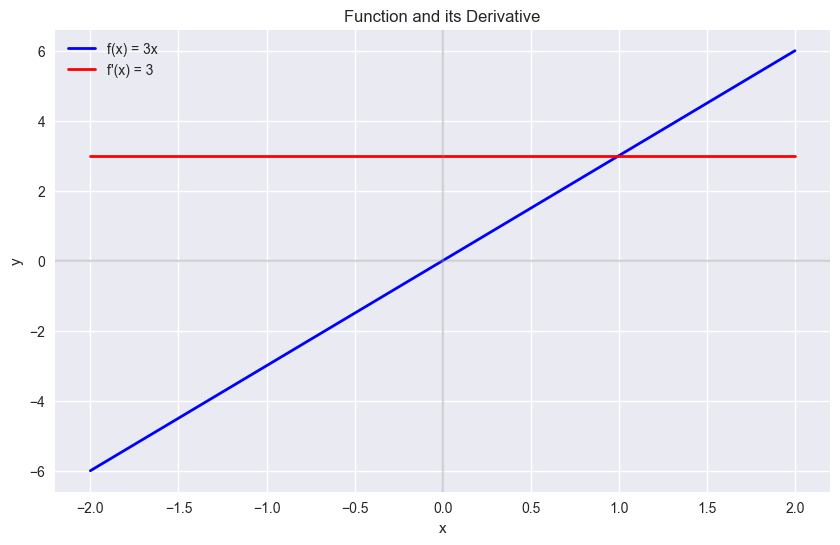

Symbolic Verification:
f(x) = 3*x
f'(x) = 3


In [34]:
# Let's verify the derivative of f(x) = 3x

# Define the function and its derivative
def f(x: float) -> float:
    """Calculate 3 times x.

    Args:
        x: The input value

    Returns:
        3 times x
    """
    return 3 * x


def analytical_derivative(x: float) -> float:
    """Calculate the derivative of 3x.

    Args:
        x: The input value

    Returns:
        The derivative of 3x, which is 3
    """
    return 3  # The derivative of 3x is 3


# Create a range of x values
x = np.linspace(-2, 2, 1000)

# Plot the function and its derivative
plt.figure(figsize=(10, 6))

plt.plot(x, f(x), "b-", linewidth=2, label="f(x) = 3x")
plt.plot(x, np.full_like(x, 3), "r-", linewidth=2, label="f'(x) = 3")

plt.grid(True)
plt.title("Function and its Derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.axhline(y=0, color="gray", linestyle="-", alpha=0.3)
plt.axvline(x=0, color="gray", linestyle="-", alpha=0.3)
plt.show()

# Symbolic verification
x = sp.Symbol("x")
f_sym = 3 * x
f_prime_sym = sp.diff(f_sym, x)

print("Symbolic Verification:")
print(f"f(x) = {f_sym}")
print(f"f'(x) = {f_prime_sym}")

## Velocity: A Real-World Application

If $s(t)$ represents an object's position at time t:

- $s(t)$ is the position function
- $s'(t)$ is the velocity function (the derivative of position)

For example, if a car's position is $s(t) = t^2$, then its velocity is $s'(t) = 2t$.

- At t=1 second, velocity = 2(1) = 2 meters/second
- At t=5 seconds, velocity = 2(5) = 10 meters/second

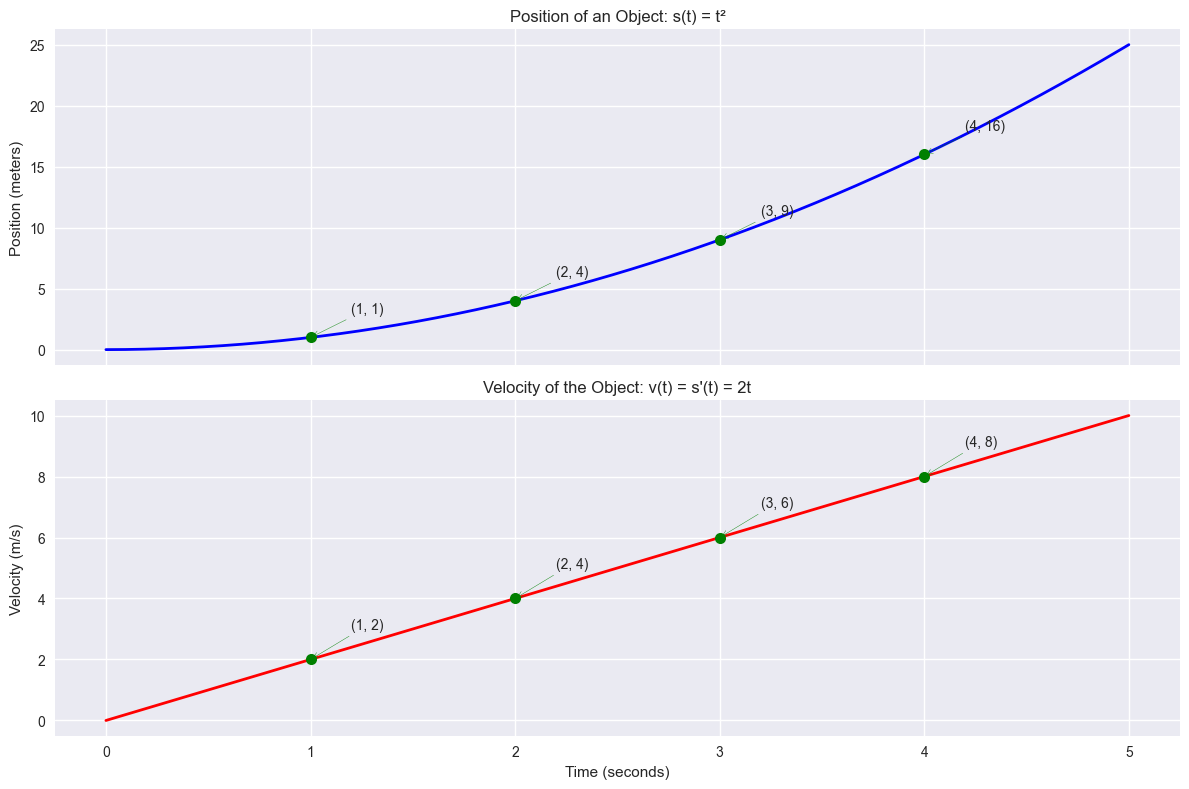

In [35]:
# Let's visualize position, velocity for an object in motion
def position(t: float) -> float:
    """Calculate the position of an object at time t.

    Args:
        t: Time in seconds

    Returns:
        Position in meters (t^2)
    """
    return t**2  # Position function: s(t) = t²


def velocity(t: float) -> float:
    """Calculate the velocity of an object at time t.

    Args:
        t: Time in seconds

    Returns:
        Velocity in meters per second (2t)
    """
    return 2 * t  # Velocity function: v(t) = 2t


# Create time values
t = np.linspace(0, 5, 1000)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot position
ax1.plot(t, position(t), "b-", linewidth=2)
ax1.set_title("Position of an Object: s(t) = t²")
ax1.set_ylabel("Position (meters)")
ax1.grid(True)

# Plot velocity
ax2.plot(t, velocity(t), "r-", linewidth=2)
ax2.set_title("Velocity of the Object: v(t) = s'(t) = 2t")
ax2.set_xlabel("Time (seconds)")
ax2.set_ylabel("Velocity (m/s)")
ax2.grid(True)

# Mark some specific times
times = [1, 2, 3, 4]
for time in times:
    # Mark position
    ax1.plot(time, position(time), "go", markersize=8)
    ax1.annotate(
        f"({time}, {position(time)})",
        xy=(time, position(time)),
        xytext=(time + 0.2, position(time) + 2),
        arrowprops=dict(arrowstyle="->", color="green"),
    )

    # Mark velocity
    ax2.plot(time, velocity(time), "go", markersize=8)
    ax2.annotate(
        f"({time}, {velocity(time)})",
        xy=(time, velocity(time)),
        xytext=(time + 0.2, velocity(time) + 1),
        arrowprops=dict(arrowstyle="->", color="green"),
    )

plt.tight_layout()
plt.show()

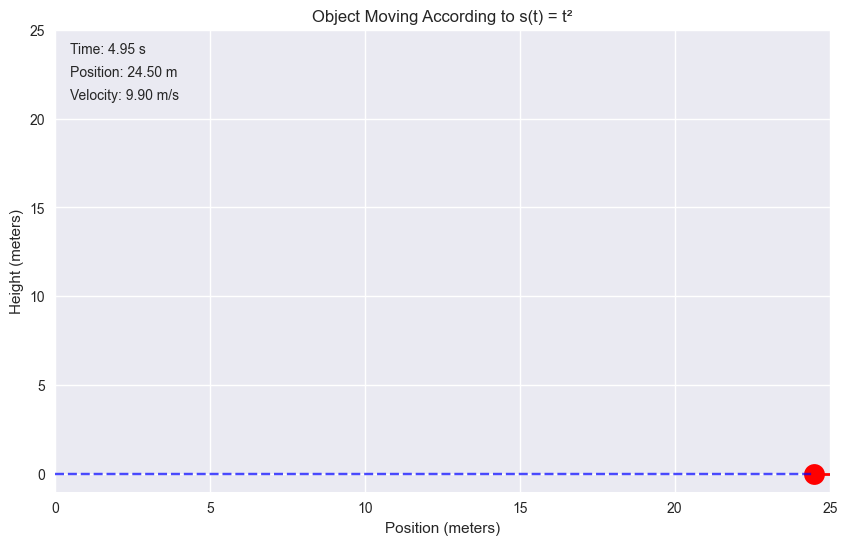

In [36]:
# Let's animate the movement of the object
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Set plot limits
ax.set_xlim(0, 25)
ax.set_ylim(-1, 25)
ax.set_xlabel("Position (meters)")
ax.set_ylabel("Height (meters)")
ax.set_title("Object Moving According to s(t) = t²")
ax.grid(True)

# Create the object (a point)
(point,) = ax.plot([], [], "ro", markersize=15)

# Create velocity vector
(velocity_arrow,) = ax.plot([], [], "r-", linewidth=2)

# Create the path line (showing where the object has been)
(path,) = ax.plot([], [], "b--", alpha=0.7)

# Parameters
max_time = 5  # seconds
time_text = ax.text(0.02, 0.95, "", transform=ax.transAxes)
position_text = ax.text(0.02, 0.9, "", transform=ax.transAxes)
velocity_text = ax.text(0.02, 0.85, "", transform=ax.transAxes)


def init():
    point.set_data([], [])
    velocity_arrow.set_data([], [])
    path.set_data([], [])
    time_text.set_text("")
    position_text.set_text("")
    velocity_text.set_text("")
    return point, velocity_arrow, path, time_text, position_text, velocity_text


def animate(i):
    t = i * max_time / 100  # Current time

    # Calculate position and velocity
    pos = position(t)
    vel = velocity(t)

    # Update object position
    point.set_data([pos], [0])

    # Update velocity vector
    arrow_length = vel / 2  # Scale the arrow
    velocity_arrow.set_data([pos, pos + arrow_length], [0, 0])

    # Update path
    path_t = np.linspace(0, t, 100)
    path_pos = position(path_t)
    path.set_data(path_pos, np.zeros_like(path_pos))

    # Update text
    time_text.set_text(f"Time: {t:.2f} s")
    position_text.set_text(f"Position: {pos:.2f} m")
    velocity_text.set_text(f"Velocity: {vel:.2f} m/s")

    return point, velocity_arrow, path, time_text, position_text, velocity_text


# Create animation
anim = FuncAnimation(fig, animate, frames=100, interval=50, blit=True, init_func=init)

# Display the animation
HTML(anim.to_jshtml())

## Exercise 3: Exploring Derivatives

1. Using the definition of the derivative as a limit, find the derivative of $f(x) = 3x + 1$.
   (Hint: Follow the step-by-step approach we used above)

2. For the function $g(x) = x^2$, calculate:
   a) $g'(2)$ (We already know $g'(x) = 2x$, so calculate the value when x=2)
   b) What does this value tell you about the function at x = 2?

3. The position of a moving object is given by $s(t) = t^2 - 4t + 5$, where t is time in seconds.
   a) Find the velocity function $v(t)$ (remember, velocity is the derivative of position)
   b) Find the velocity at t = 3
   c) Is the object moving forward or backward at t = 1? (Hint: forward means positive velocity)

4. For each of these cases, determine if the derivative would be positive, negative, or zero:
   a) A function at a point where it's increasing
   b) A function at its maximum value
   c) A function at a point where it's decreasing
   d) A linear function with negative slope

Exercise 1: Derivative of f(x) = 3x + 1
--------------------------------------------------
    x     |    f(x)    |  Numerical f'(x) 
--------------------------------------------------
    -2     |   -5.00    |      3.00      
    -1     |   -2.00    |      3.00      
    0      |    1.00    |      3.00      
    1      |    4.00    |      3.00      
    2      |    7.00    |      3.00      

Symbolic result:
f(x) = 3*x + 1
f'(x) = 3

Exercise 2:
g(x) = x^2
g'(x) = 2x
g'(2) = 2·2 = 4

Exercise 3:
Position function: s(t) = t**2 - 4*t + 5
Velocity function: v(t) = 2*t - 4
Velocity at t = 3: v(3) = 2
Velocity at t = 1: v(1) = -2
At t = 1, the object is moving backward


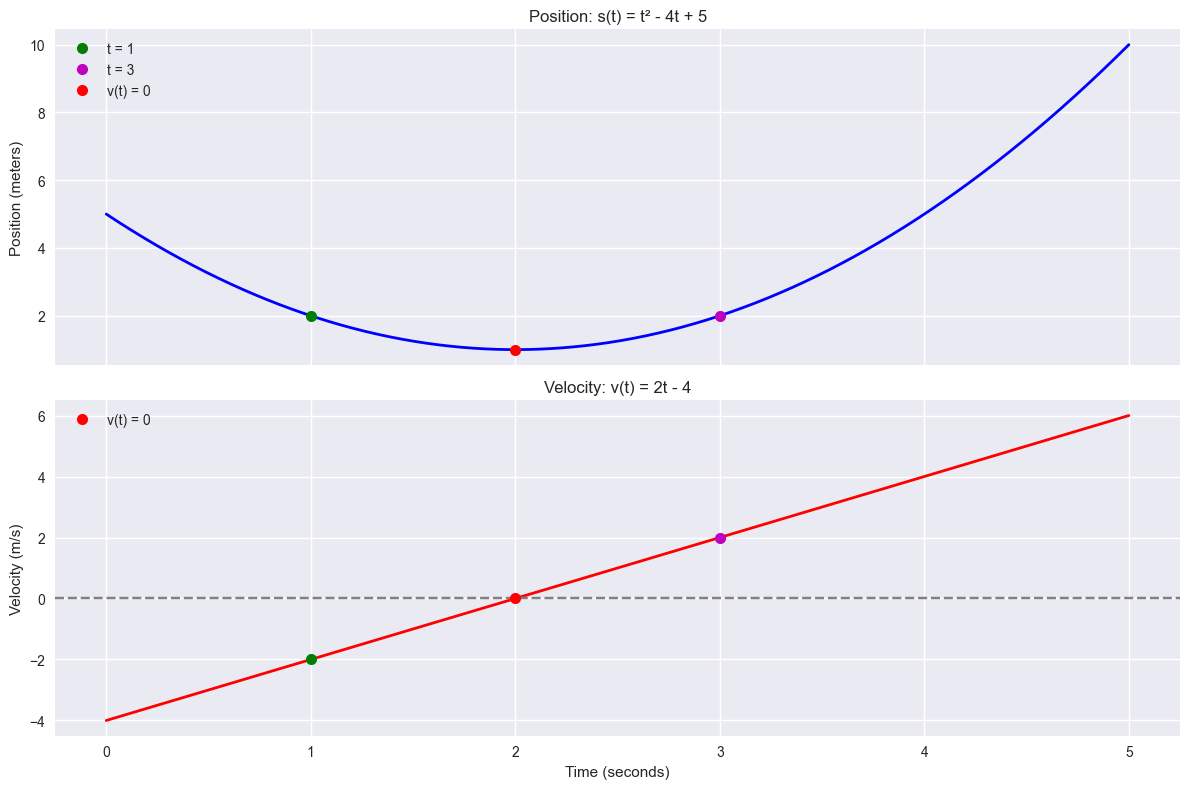

In [37]:
# Let's use Python to help us solve some of these exercises

# Exercise 1: Find the derivative of f(x) = 3x + 1
def f1(x: float) -> float:
    """Calculate 3x + 1.

    Args:
        x: The input value

    Returns:
        3x + 1
    """
    return 3 * x + 1


# Let's use both the numerical approach and symbolic approach
def numerical_derivative(f: callable, x: float, h: float = 0.0001) -> float:
    """Calculate a numerical approximation of the derivative.

    Args:
        f: The function to differentiate
        x: The point where we're calculating the derivative
        h: The small step size for approximation

    Returns:
        The numerical approximation of the derivative
    """
    return (f(x + h) - f(x)) / h


# Test at different values of x
x_values = [-2, -1, 0, 1, 2]
derivative_values = [numerical_derivative(f1, x) for x in x_values]

print("Exercise 1: Derivative of f(x) = 3x + 1")
print("-" * 50)
# Fixed string that was causing issues
print("    x     |    f(x)    |  Numerical f'(x) ")
print("-" * 50)
for x, deriv in zip(x_values, derivative_values):
    print(f"{x:^10} | {f1(x):^10.2f} | {deriv:^15.2f}")

# Using symbolic differentiation
x = sp.Symbol("x")
f1_sym = 3 * x + 1
f1_prime_sym = sp.diff(f1_sym, x)

print("\nSymbolic result:")
print(f"f(x) = {f1_sym}")
print(f"f'(x) = {f1_prime_sym}")


# Exercise 2: For g(x) = x^2
def g(x: float) -> float:
    """Calculate x squared.

    Args:
        x: The input value

    Returns:
        The square of x
    """
    return x**2


def g_prime(x: float) -> float:
    """Calculate the derivative of x squared.

    Args:
        x: The input value

    Returns:
        The derivative of x squared (2x)
    """
    return 2 * x


# Calculate g'(2)
g_prime_at_2 = g_prime(2)
print("\nExercise 2:")
print(f"g(x) = x^2")
print(f"g'(x) = 2x")
print(f"g'(2) = 2·2 = {g_prime_at_2}")


# Exercise 3: Position function s(t) = t^2 - 4t + 5
def s(t: float) -> float:
    """Calculate the position function s(t) = t^2 - 4t + 5.

    Args:
        t: Time in seconds

    Returns:
        Position at time t
    """
    return t**2 - 4 * t + 5


# Let's find the velocity function symbolically
t = sp.Symbol("t")
s_sym = t**2 - 4 * t + 5
v_sym = sp.diff(s_sym, t)

print("\nExercise 3:")
print(f"Position function: s(t) = {s_sym}")
print(f"Velocity function: v(t) = {v_sym}")

# Convert symbolic expression to a Python function
v_expr = sp.lambdify(t, v_sym, "numpy")

# Velocity at t = 3
v_at_3 = v_expr(3)
print(f"Velocity at t = 3: v(3) = {v_at_3}")

# Velocity at t = 1
v_at_1 = v_expr(1)
print(f"Velocity at t = 1: v(1) = {v_at_1}")
print(f"At t = 1, the object is moving {'forward' if v_at_1 > 0 else 'backward'}")

# Let's visualize this motion
time = np.linspace(0, 5, 1000)
position = np.array([s(ti) for ti in time])
velocity = np.array([v_expr(ti) for ti in time])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot position
ax1.plot(time, position, "b-", linewidth=2)
ax1.set_title("Position: s(t) = t² - 4t + 5")
ax1.set_ylabel("Position (meters)")
ax1.grid(True)

# Plot velocity
ax2.plot(time, velocity, "r-", linewidth=2)
ax2.set_title("Velocity: v(t) = 2t - 4")
ax2.set_xlabel("Time (seconds)")
ax2.set_ylabel("Velocity (m/s)")
ax2.grid(True)
ax2.axhline(y=0, color="gray", linestyle="--")

# Mark the special points
ax1.plot(1, s(1), "go", markersize=8, label="t = 1")
ax1.plot(3, s(3), "mo", markersize=8, label="t = 3")
ax2.plot(1, v_expr(1), "go", markersize=8)
ax2.plot(3, v_expr(3), "mo", markersize=8)

# Mark t = 2 when velocity = 0
zero_velocity_time = 2  # Solving 2t - 4 = 0 gives t = 2
ax1.plot(zero_velocity_time, s(zero_velocity_time), "ro", markersize=8, label="v(t) = 0")
ax2.plot(zero_velocity_time, 0, "ro", markersize=8, label="v(t) = 0")

ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

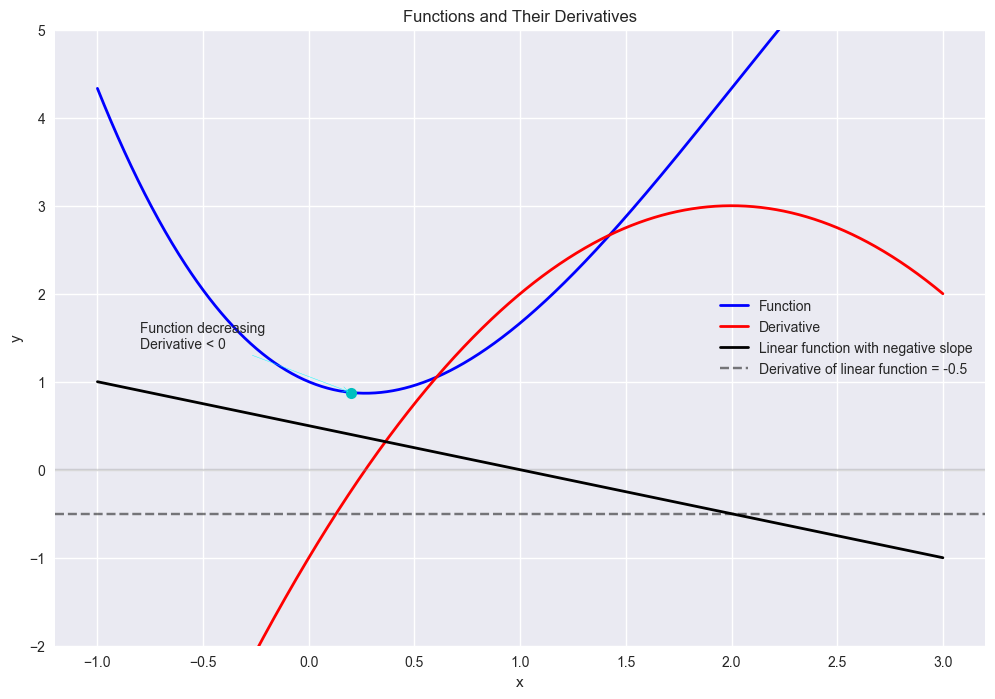

In [38]:
# For Exercise 4, let's visualize the four cases
# Create a custom function with all the cases
def example_function(x: float) -> float:
    """Calculate a function that demonstrates different derivative behaviors.

    Args:
        x: The input value

    Returns:
        -x^3/3 + 2x^2 - x + 1
    """
    return -(x**3) / 3 + 2 * x**2 - x + 1


def example_derivative(x: float) -> float:
    """Calculate the derivative of the example function.

    Args:
        x: The input value

    Returns:
        The derivative: -x^2 + 4x - 1
    """
    return -(x**2) + 4 * x - 1


# Create x values
x = np.linspace(-1, 3, 1000)
y = example_function(x)
dy = example_derivative(x)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the function and its derivative
plt.plot(x, y, "b-", linewidth=2, label="Function")
plt.plot(x, dy, "r-", linewidth=2, label="Derivative")
plt.axhline(y=0, color="gray", linestyle="-", alpha=0.3)

# Mark special points
# 1. Point where function is increasing
x1 = 2.5
plt.plot(x1, example_function(x1), "go", markersize=8)
plt.annotate(
    "Function increasing\nDerivative > 0",
    xy=(x1, example_function(x1)),
    xytext=(x1 + 0.2, example_function(x1) + 0.5),
    arrowprops=dict(arrowstyle="->", color="green"),
)

# 2. Point at local maximum
x2 = 3
plt.plot(x2, example_function(x2), "mo", markersize=8)
plt.annotate(
    "Local maximum\nDerivative = 0",
    xy=(x2, example_function(x2)),
    xytext=(x2 - 0.8, example_function(x2) + 0.5),
    arrowprops=dict(arrowstyle="->", color="magenta"),
)

# 3. Point where function is decreasing
x3 = 0.2
plt.plot(x3, example_function(x3), "co", markersize=8)
plt.annotate(
    "Function decreasing\nDerivative < 0",
    xy=(x3, example_function(x3)),
    xytext=(x3 - 1, example_function(x3) + 0.5),
    arrowprops=dict(arrowstyle="->", color="cyan"),
)


# 4. Linear function with negative slope
# Add a simple linear function with negative slope
def linear_func(x: float) -> float:
    """Calculate a linear function with negative slope.

    Args:
        x: The input value

    Returns:
        -0.5*x + 0.5
    """
    return -0.5 * x + 0.5


plt.plot(x, linear_func(x), "k-", linewidth=2, label="Linear function with negative slope")
plt.axhline(y=-0.5, color="k", linestyle="--", alpha=0.5, label="Derivative of linear function = -0.5")

plt.grid(True)
plt.title("Functions and Their Derivatives")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.ylim(-2, 5)
plt.show()

---

After completing these problems, we'll move on to derivative rules that will make calculations much easier!